# Imports

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

# Load the data


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print 'Train size:', x_train.shape[0]
print 'Test size:', x_test.shape[0]

Train size: 60000
Test size: 10000


# Build the network 

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print l.name, l.input_shape,'==>',l.output_shape
print
print model.summary()

dense_1 (None, 784) ==> (None, 512)
dense_2 (None, 512) ==> (None, 10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


# Train the network

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s - loss: 0.2606 - acc: 0.9243 - val_loss: 0.1304 - val_acc: 0.9604
Epoch 2/5
60000/60000 [==============================] - 3s - loss: 0.1039 - acc: 0.9693 - val_loss: 0.0967 - val_acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 3s - loss: 0.0683 - acc: 0.9792 - val_loss: 0.0752 - val_acc: 0.9758
Epoch 4/5
60000/60000 [==============================] - 3s - loss: 0.0497 - acc: 0.9856 - val_loss: 0.0723 - val_acc: 0.9782
Epoch 5/5
60000/60000 [==============================] - 3s - loss: 0.0373 - acc: 0.9885 - val_loss: 0.0625 - val_acc: 0.9809

Test loss: 0.062
Test accuracy: 0.981


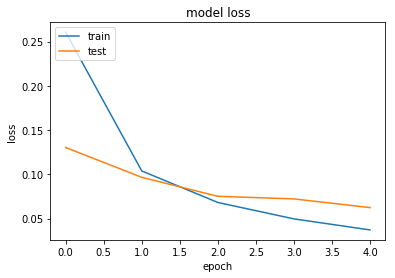

In [7]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print
print 'Test loss:', round(score[0], 3)
print 'Test accuracy:', round(score[1], 3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Build networks using all activations

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s - loss: 0.3870 - acc: 0.8884 - val_loss: 0.3389 - val_acc: 0.9049
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.3099 - acc: 0.9128 - val_loss: 0.2919 - val_acc: 0.9164
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.2969 - acc: 0.9176 - val_loss: 0.3060 - val_acc: 0.9178
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.2888 - acc: 0.9192 - val_loss: 0.3191 - val_acc: 0.9096
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.2824 - acc: 0.9221 - val_loss: 0.3028 - val_acc: 0.9171
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.2782 - acc: 0.9228 - val_loss: 0.2911 - val_acc: 0.9227
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.2756 - acc: 0.9234 - val_loss: 0.2802 - val_acc: 0.9229
Epoch 8/20
60000/60000 [==============================] - 3s 

60000/60000 [==============================] - 3s - loss: 0.0687 - acc: 0.9792 - val_loss: 0.0891 - val_acc: 0.9737
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.0493 - acc: 0.9848 - val_loss: 0.0680 - val_acc: 0.9792
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.0372 - acc: 0.9886 - val_loss: 0.0744 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.0282 - acc: 0.9916 - val_loss: 0.0808 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.0221 - acc: 0.9931 - val_loss: 0.0659 - val_acc: 0.9821
Epoch 8/20
60000/60000 [==============================] - 3s - loss: 0.0174 - acc: 0.9948 - val_loss: 0.0690 - val_acc: 0.9819
Epoch 9/20
60000/60000 [==============================] - 3s - loss: 0.0130 - acc: 0.9961 - val_loss: 0.0709 - val_acc: 0.9825
Epoch 10/20
60000/60000 [==============================] - 3s - loss: 0.0103 - acc: 0.9972 - val_loss: 0.0712 - val_acc: 0

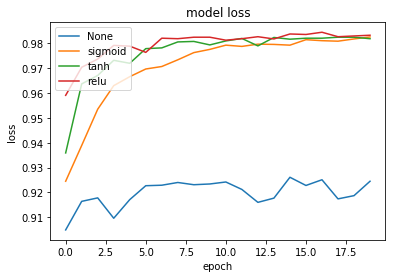

In [8]:
epochs = 20

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_acc'])
    
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')